# Importing libraries and data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
data=pd.read_csv('Iris.csv')

# Examining data

In [9]:
data_n=data.drop('Id', axis=1)
data_n.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

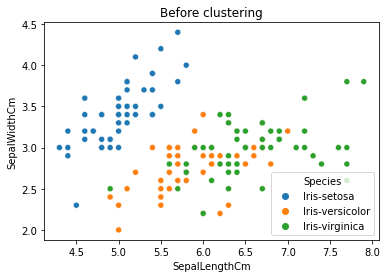

In [11]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm', data=data, hue='Species')
plt.title('Before clustering')
plt.show()

Here, you can see how the data is plotted before clustering 

# Clustering by Elbow Method

In [12]:
from sklearn.cluster import KMeans

In [13]:
data_k=data_n.drop('Species',axis=1)

clr=[]

for cluster in range (1,10):
    kmeans=KMeans(n_clusters=cluster, init='k-means++',n_init=10, max_iter=300)
    kmeans.fit(data_k)
    clr.append(kmeans.inertia_)

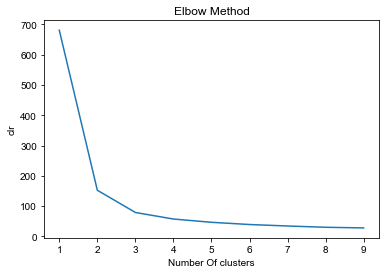

In [14]:
plt.plot(range(1,10),clr)
plt.title('Elbow Method')
plt.xlabel('Number Of clusters')
plt.ylabel('clr')
sns.set_style('darkgrid')
plt.show()

Hence, the optimum number of clusters is 3.

In [15]:
kmeans=KMeans(n_clusters=3,init='k-means++',n_init=10, max_iter=300)
kmeans.fit(data_k)
pred=kmeans.predict(data_k)

In [16]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [17]:
preds=[]
for i in pred:
    if i==0:
        preds.append('iris-setosa')
    elif i==1:
        preds.append('iris-versicolor')
    elif i==2:
        preds.append('iris-virginica')
        

# Visual Representation of clusters

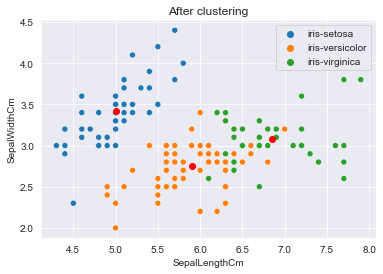

In [29]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm', data=data_k, hue=preds)
plt.scatter(centers[:,0],centers[:,1],marker='o',color='r')
plt.title('After clustering')
plt.show()